# **Step 1: Set Up the Environment**
You need to have Python installed along with necessary libraries like TensorFlow, Keras, NumPy, Matplotlib, Seaborn, and Scikit-learn.

Install the required libraries using pip:

In [1]:
!pip install tensorflow numpy matplotlib seaborn scikit-learn

# **Step 2: Load and Prepare the Dataset**
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It is already included in TensorFlow's datasets library, so you can directly load it.

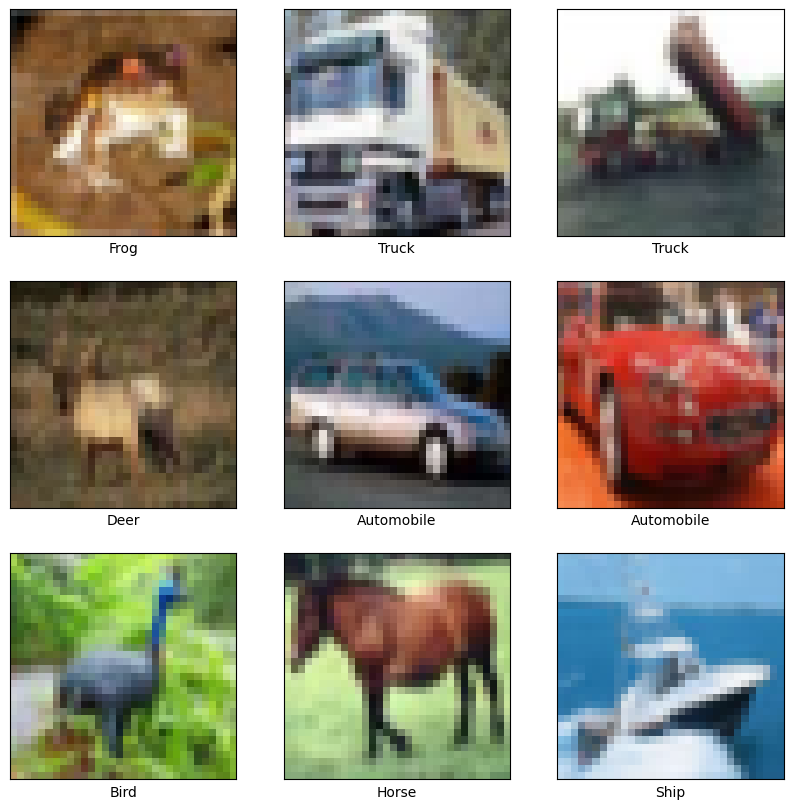

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show some sample images from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

This code loads and normalizes the dataset, then shows some sample images with their labels.

# **Step 3: Build the CNN Model**
We'll now define a CNN with multiple convolutional layers, followed by pooling layers, and finally, a fully connected layer.

In [5]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])

# Print model summary to check architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Here, we have 3 convolutional layers, each followed by a pooling layer to reduce the spatial dimensions of the feature maps.

# **Step 4: Compile the Model**
Before training, compile the model by specifying the loss function, optimizer, and evaluation metrics.

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We use the Adam optimizer for faster convergence and Sparse Categorical Crossentropy as the loss function because we have integer labels.

# **Step 5: Train the Model**
Now, train the model on the CIFAR-10 dataset. You can adjust the number of epochs and batch size as needed.

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.3411 - loss: 1.7864 - val_accuracy: 0.5164 - val_loss: 1.3195
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.5650 - loss: 1.2184 - val_accuracy: 0.5997 - val_loss: 1.1117
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 50ms/step - accuracy: 0.6353 - loss: 1.0282 - val_accuracy: 0.6378 - val_loss: 1.0224
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6794 - loss: 0.9104 - val_accuracy: 0.6692 - val_loss: 0.9315
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.7082 - loss: 0.8305 - val_accuracy: 0.6801 - val_loss: 0.9290
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.7320 - loss: 0.7690 - val_accuracy: 0.7026 - val_loss: 0.8558
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7488 - loss: 0.7135 - val_accuracy: 0.6953 - val_loss: 0.8890
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.769

The training will run for 10 epochs, and after each epoch, it will validate the model on the test dataset. You can track the training progress in terms of accuracy and loss.

# **Step 6: Evaluate the Model**
After training, evaluate the model's performance on the test dataset.

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 6s - 18ms/step - accuracy: 0.7045 - loss: 0.9179
Test accuracy: 0.7045000195503235


This step will give you the final test accuracy after training.

# **Step 7: Save the Trained Model Weights**
You may want to save the trained model’s weights so that you can load them later without retraining the model.

In [9]:
# Save the model weights
model.save_weights('cnn_cifar10_weights.weights.h5')

# **Step 8: Make Predictions and Evaluate with a Confusion Matrix**
To better understand the model’s performance, make predictions on the test dataset and plot a confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


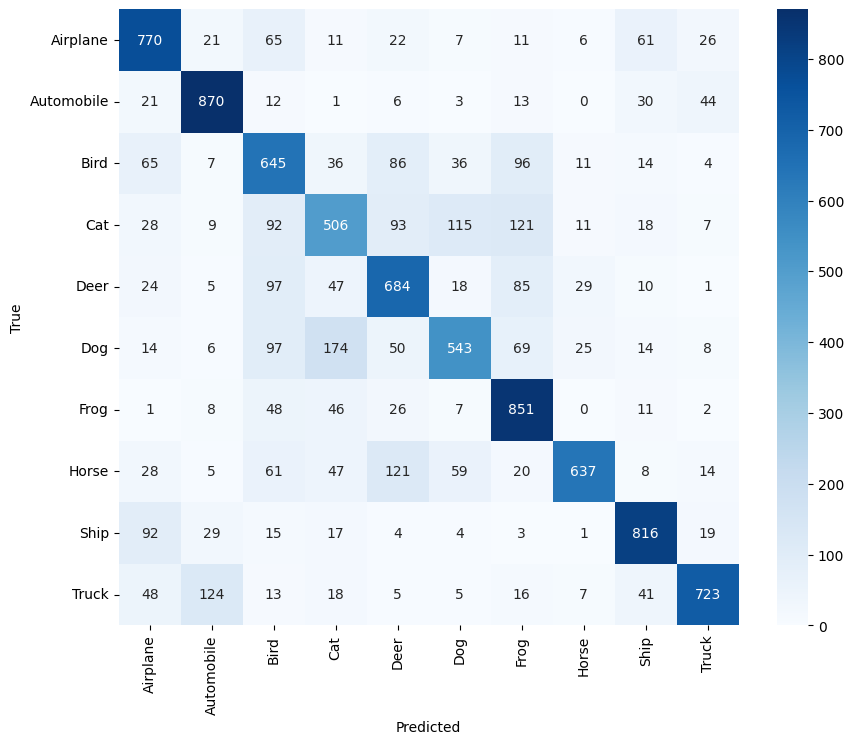

Accuracy: 0.7045


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

This step will generate a confusion matrix to visualize how well the model performed for each class. You can also print the accuracy based on the predictions.

# **Step 9: Plot Training and Validation Metrics**
To analyze the training process, you can plot the training and validation accuracy and loss over epochs.

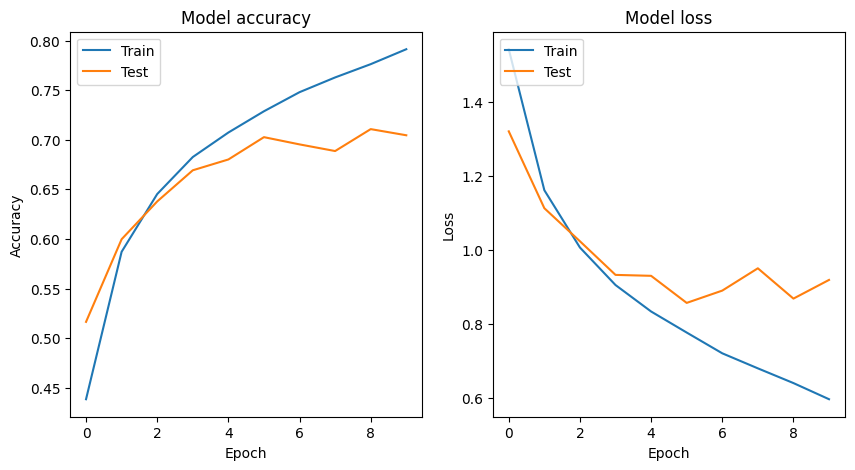

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

This will provide you with a clear view of how well the model is learning and whether it's overfitting.